## Created by Joshua Ostaszewski and used in Ostaszewski et al. 2024

#### Some mesovortex stat plots in conjection with PerilsPlots

In [1]:
import pandas as pd
import datetime as dt
from functions import calc_dewpoint, calc_thetae, calc_thetav
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import cmocean
import matplotlib.lines as mlines
from metpy import interpolate
from scipy.stats import stats
    
%pylab inline
%config InlineBackend.figure_format='retina'

Populating the interactive namespace from numpy and matplotlib


In [2]:
def get_mode_T1(mode, typ, tor):
    ''' 
    mode is linear, supercell, or mixed
    typ is R or T'''
    return sns1[(sns1['mode']==mode) & (sns1['type']==typ) & (sns1['tor']==tor)]
def get_mode_T2(mode, typ, tor):
    ''' 
    mode is linear, supercell, or mixed
    typ is R or T'''
    return sns2[(sns2['mode']==mode) & (sns2['type']==typ) & (sns2['tor']==tor)]
def get_mode_T3(mode, typ, tor):
    ''' 
    mode is linear, supercell, or mixed
    typ is R or T'''
    return sns3[(sns3['mode']==mode) & (sns3['type']==typ) & (sns3['tor']==tor)]
def get_mode_T4(mode, typ, tor):
    ''' 
    mode is linear, supercell, or mixed
    typ is R or T'''
    return sns4[(sns4['mode']==mode) & (sns4['type']==typ) & (sns4['tor']==tor)]
def get_mode_T22(mode, typ, tor):
    ''' 
    mode is linear, supercell, or mixed
    typ is R or T'''
    return sns22[(sns22['mode']==mode) & (sns22['type']==typ) & (sns22['tor']==tor)]
def get_mode_T5(mode, typ, tor):
    ''' 
    mode is linear, supercell, or mixed
    typ is R or T'''
    return sns5[(sns5['mode']==mode) & (sns5['type']==typ) & (sns5['tor']==tor)]

In [3]:
SNSfile1 = 'E:\\PERiLS_Y1\\Excel_SN\\After_CPA\\IOP1_Grad_Analysis.csv'
sns1 = pd.read_csv(SNSfile1)

sns1 = sns1.rename(columns={"TV_dist": "TV", "TE_dist": "TE"})
sns1 = sns1[sns1['TOA_coldpool_final'].notna()]
sns1 = sns1.set_index(sns1['ID'])

SNSfile2 = 'E:\\PERiLS_Y1\\Excel_SN\\After_CPA\\IOP2_Grad_Analysis.csv'
sns2 = pd.read_csv(SNSfile2)

sns2 = sns2.rename(columns={"TV_dist": "TV", "TE_dist": "TE"})
sns2 = sns2[sns2['TOA_coldpool_final'].notna()]
sns2 = sns2.set_index(sns2['ID'])

SNSfile3 = 'E:\\PERiLS_Y1\\Excel_SN\\After_CPA\\IOP3_Grad_Analysis.csv'
sns3 = pd.read_csv(SNSfile3)

sns3 = sns3.rename(columns={"TV_dist": "TV", "TE_dist": "TE"})
sns3 = sns3[sns3['TOA_coldpool_final'].notna()]
sns3 = sns3.set_index(sns3['ID'])

SNSfile4 = 'E:\\PERiLS_Y1\\Excel_SN\\After_CPA\\IOP4_Grad_Analysis.csv'
sns4 = pd.read_csv(SNSfile4)

sns4 = sns4.rename(columns={"TV_dist": "TV", "TE_dist": "TE"})
sns4 = sns4[sns4['TOA_coldpool_final'].notna()]
sns4 = sns4.set_index(sns4['ID'])

SNSfile22 = 'E:\\PERiLS_Y2\\Excel_SN\\After_CPA\\IOP2Y2_Grad_Analysis.csv'
sns22 = pd.read_csv(SNSfile22)

sns22 = sns22.rename(columns={"TV_dist": "TV", "TE_dist": "TE"})
sns22 = sns22[sns22['TOA_coldpool_final'].notna()]
sns22 = sns22.set_index(sns22['ID'])

SNSfile5 = 'E:\\PERiLS_Y2\\Excel_SN\\After_CPA\\IOP5Y2_Grad_Analysis.csv'
sns5 = pd.read_csv(SNSfile5)

sns5 = sns5.rename(columns={"TV_dist": "TV", "TE_dist": "TE"})
sns5 = sns5[sns5['TOA_coldpool_final'].notna()]
sns5 = sns5.set_index(sns5['ID'])


mode_functions = [get_mode_T1,get_mode_T2,get_mode_T3,get_mode_T4,get_mode_T22,get_mode_T5]

In [4]:
MVNT = []
MVTOT = []
MVPre = []
MVPost = []

for get_mode_T in mode_functions:
    
    MV_NT = get_mode_T('Mesovortex','R','NT')
    
    MV_TOT = get_mode_T('Mesovortex','R','TOT')
    MV_Pre = get_mode_T('Mesovortex','R','Pre')
    MV_Post = get_mode_T('Mesovortex','R','Post')
    
    MVNT.append(MV_NT)
    
    MVTOT.append(MV_TOT)
    MVPre.append(MV_Pre)
    MVPost.append(MV_Post)
    
MV_NT = pd.concat([MVNT[0],MVNT[1],MVNT[2],MVNT[3],MVNT[4],MVNT[5]])
MV_T = pd.concat([MVTOT[0],MVPre[0],MVPost[0],MVTOT[1],MVPre[1],MVPost[1],MVTOT[2],MVPre[2],MVPost[2],MVTOT[3],MVPre[3],MVPost[3],MVTOT[4],MVPre[4],MVPost[4],MVTOT[5],MVPre[5],MVPost[5]])

In [5]:
from scipy.stats import pearsonr
N_NT, _ = pearsonr((abs(MV_NT.loc[MV_NT.Directionality == 'N']['dTVdn'])),(MV_NT.loc[MV_NT.Directionality == 'N']['MV_H_dist']))
S_NT, _ = pearsonr((abs(MV_NT.loc[MV_NT.Directionality == 'S']['dTVdn'])),(MV_NT.loc[MV_NT.Directionality == 'S']['MV_H_dist']))
N_TOT, _ = pearsonr((abs(MV_T.loc[(MV_T.Directionality == 'N') & (MV_T.tor == 'TOT')]['dTVdn'])), (MV_T.loc[(MV_T.Directionality == 'N') & (MV_T.tor == 'TOT')]['MV_H_dist']))
S_TOT, _ = pearsonr((abs(MV_T.loc[(MV_T.Directionality == 'S') & (MV_T.tor == 'TOT')]['dTVdn'])), (MV_T.loc[(MV_T.Directionality == 'S') & (MV_T.tor == 'TOT')]['MV_H_dist']))
N_HIST, _ = pearsonr((abs(MV_T.loc[(MV_T.Directionality == 'N') & (MV_T.tor != 'TOT') & (MV_T.tor != 'NT')]['dTVdn'])),(MV_T.loc[(MV_T.Directionality == "N") & (MV_T.tor != 'TOT') & (MV_T.tor != 'NT')]['MV_H_dist']))
S_HIST, _ = pearsonr((abs(MV_T.loc[(MV_T.Directionality == 'S') & (MV_T.tor != 'TOT') & (MV_T.tor != 'NT')]['dTVdn'])),(MV_T.loc[(MV_T.Directionality == "S") & (MV_T.tor != 'TOT') & (MV_T.tor != 'NT')]['MV_H_dist']))

N_NT1, _ = pearsonr((abs(MV_NT.loc[MV_NT.Directionality == 'N']['TV'])),(MV_NT.loc[MV_NT.Directionality == 'N']['MV_H_dist']))
S_NT1, _ = pearsonr((abs(MV_NT.loc[MV_NT.Directionality == 'S']['TV'])),(MV_NT.loc[MV_NT.Directionality == 'S']['MV_H_dist']))
N_TOT1, _ = pearsonr((abs(MV_T.loc[(MV_T.Directionality == 'N') & (MV_T.tor == 'TOT')]['TV'])), (MV_T.loc[(MV_T.Directionality == 'N') & (MV_T.tor == 'TOT')]['MV_H_dist']))
S_TOT1, _ = pearsonr((abs(MV_T.loc[(MV_T.Directionality == 'S') & (MV_T.tor == 'TOT')]['TV'])), (MV_T.loc[(MV_T.Directionality == 'S') & (MV_T.tor == 'TOT')]['MV_H_dist']))
N_HIST1, _ = pearsonr((abs(MV_T.loc[(MV_T.Directionality == 'N') & (MV_T.tor != 'TOT') & (MV_T.tor != 'NT')]['TV'])),(MV_T.loc[(MV_T.Directionality == "N") & (MV_T.tor != 'TOT') & (MV_T.tor != 'NT')]['MV_H_dist']))
S_HIST1, _ = pearsonr((abs(MV_T.loc[(MV_T.Directionality == 'S') & (MV_T.tor != 'TOT') & (MV_T.tor != 'NT')]['TV'])),(MV_T.loc[(MV_T.Directionality == "S") & (MV_T.tor != 'TOT') & (MV_T.tor != 'NT')]['MV_H_dist']))

N_NT2, _ = pearsonr((abs(MV_NT.loc[MV_NT.Directionality == 'N']['TE'])),(MV_NT.loc[MV_NT.Directionality == 'N']['MV_H_dist']))
S_NT2, _ = pearsonr((abs(MV_NT.loc[MV_NT.Directionality == 'S']['TE'])),(MV_NT.loc[MV_NT.Directionality == 'S']['MV_H_dist']))
N_TOT2, _ = pearsonr((abs(MV_T.loc[(MV_T.Directionality == 'N') & (MV_T.tor == 'TOT')]['TE'])), (MV_T.loc[(MV_T.Directionality == 'N') & (MV_T.tor == 'TOT')]['MV_H_dist']))
S_TOT2, _ = pearsonr((abs(MV_T.loc[(MV_T.Directionality == 'S') & (MV_T.tor == 'TOT')]['TE'])), (MV_T.loc[(MV_T.Directionality == 'S') & (MV_T.tor == 'TOT')]['MV_H_dist']))
N_HIST2, _ = pearsonr((abs(MV_T.loc[(MV_T.Directionality == 'N') & (MV_T.tor != 'TOT') & (MV_T.tor != 'NT')]['TE'])),(MV_T.loc[(MV_T.Directionality == "N") & (MV_T.tor != 'TOT') & (MV_T.tor != 'NT')]['MV_H_dist']))
S_HIST2, _ = pearsonr((abs(MV_T.loc[(MV_T.Directionality == 'S') & (MV_T.tor != 'TOT') & (MV_T.tor != 'NT')]['TE'])),(MV_T.loc[(MV_T.Directionality == "S") & (MV_T.tor != 'TOT') & (MV_T.tor != 'NT')]['MV_H_dist']))

In [6]:
N_total, _ = pearsonr(abs(pd.concat([(MV_NT.loc[MV_NT.Directionality == 'N']['dTVdn']),(MV_T.loc[MV_T.Directionality == 'N']['dTVdn'])])),pd.concat([(MV_NT.loc[MV_NT.Directionality == 'N']['MV_H_dist']),(MV_T.loc[MV_T.Directionality == 'N']['MV_H_dist'])]))
S_total, _ = pearsonr(abs(pd.concat([(MV_NT.loc[MV_NT.Directionality == 'S']['dTVdn']),(MV_T.loc[MV_T.Directionality == 'S']['dTVdn'])])),pd.concat([(MV_NT.loc[MV_NT.Directionality == 'S']['MV_H_dist']),(MV_T.loc[MV_T.Directionality == 'S']['MV_H_dist'])]))

N_total1, _ = pearsonr(abs(pd.concat([(MV_NT.loc[MV_NT.Directionality == 'N']['TV']),(MV_T.loc[MV_T.Directionality == 'N']['TV'])])),pd.concat([(MV_NT.loc[MV_NT.Directionality == 'N']['MV_H_dist']),(MV_T.loc[MV_T.Directionality == 'N']['MV_H_dist'])]))
S_total1, _ = pearsonr(abs(pd.concat([(MV_NT.loc[MV_NT.Directionality == 'S']['TV']),(MV_T.loc[MV_T.Directionality == 'S']['TV'])])),pd.concat([(MV_NT.loc[MV_NT.Directionality == 'S']['MV_H_dist']),(MV_T.loc[MV_T.Directionality == 'S']['MV_H_dist'])]))

N_total2, _ = pearsonr(abs(pd.concat([(MV_NT.loc[MV_NT.Directionality == 'N']['TE']),(MV_T.loc[MV_T.Directionality == 'N']['TE'])])),pd.concat([(MV_NT.loc[MV_NT.Directionality == 'N']['MV_H_dist']),(MV_T.loc[MV_T.Directionality == 'N']['MV_H_dist'])]))
S_total2, _ = pearsonr(abs(pd.concat([(MV_NT.loc[MV_NT.Directionality == 'S']['TE']),(MV_T.loc[MV_T.Directionality == 'S']['TE'])])),pd.concat([(MV_NT.loc[MV_NT.Directionality == 'S']['MV_H_dist']),(MV_T.loc[MV_T.Directionality == 'S']['MV_H_dist'])]))

In [7]:
S_total

-0.48905568936618316

In [8]:
abs(pd.concat([(MV_NT.loc[MV_NT.Directionality == 'N']['dTVdn']),(MV_T.loc[MV_T.Directionality == 'N']['dTVdn'])])).values

array([2.44, 1.29, 1.09, 2.81, 1.17, 2.08, 1.97, 1.57, 2.46, 1.35, 1.02,
       1.05, 1.23, 1.36, 0.22, 3.32, 3.06, 2.06, 3.15, 2.89, 4.39, 3.49,
       1.44, 1.03, 0.87, 4.17, 1.19, 2.21, 1.23, 3.  , 4.2 , 5.5 , 3.39,
       4.08, 2.12])

In [9]:
(pd.concat([(MV_NT.loc[MV_NT.Directionality == 'N']['MV_H_dist']),(MV_T.loc[MV_T.Directionality == 'N']['MV_H_dist'])]).values,
                        abs(pd.concat([(MV_NT.loc[MV_NT.Directionality == 'N']['dTVdn']),(MV_T.loc[MV_T.Directionality == 'N']['dTVdn'])])).values)

(array([15.,  9.,  1.,  7.,  5.,  6.,  8., 12.,  8., 10.,  6., 15., 14.,
        15.,  8.,  1.,  5.,  5.,  2.,  5., 13.,  1.,  3.,  2.,  8.,  4.,
        15.,  9., 10.,  1.,  2.,  1.,  5.,  3., 12.]),
 array([2.44, 1.29, 1.09, 2.81, 1.17, 2.08, 1.97, 1.57, 2.46, 1.35, 1.02,
        1.05, 1.23, 1.36, 0.22, 3.32, 3.06, 2.06, 3.15, 2.89, 4.39, 3.49,
        1.44, 1.03, 0.87, 4.17, 1.19, 2.21, 1.23, 3.  , 4.2 , 5.5 , 3.39,
        4.08, 2.12]))

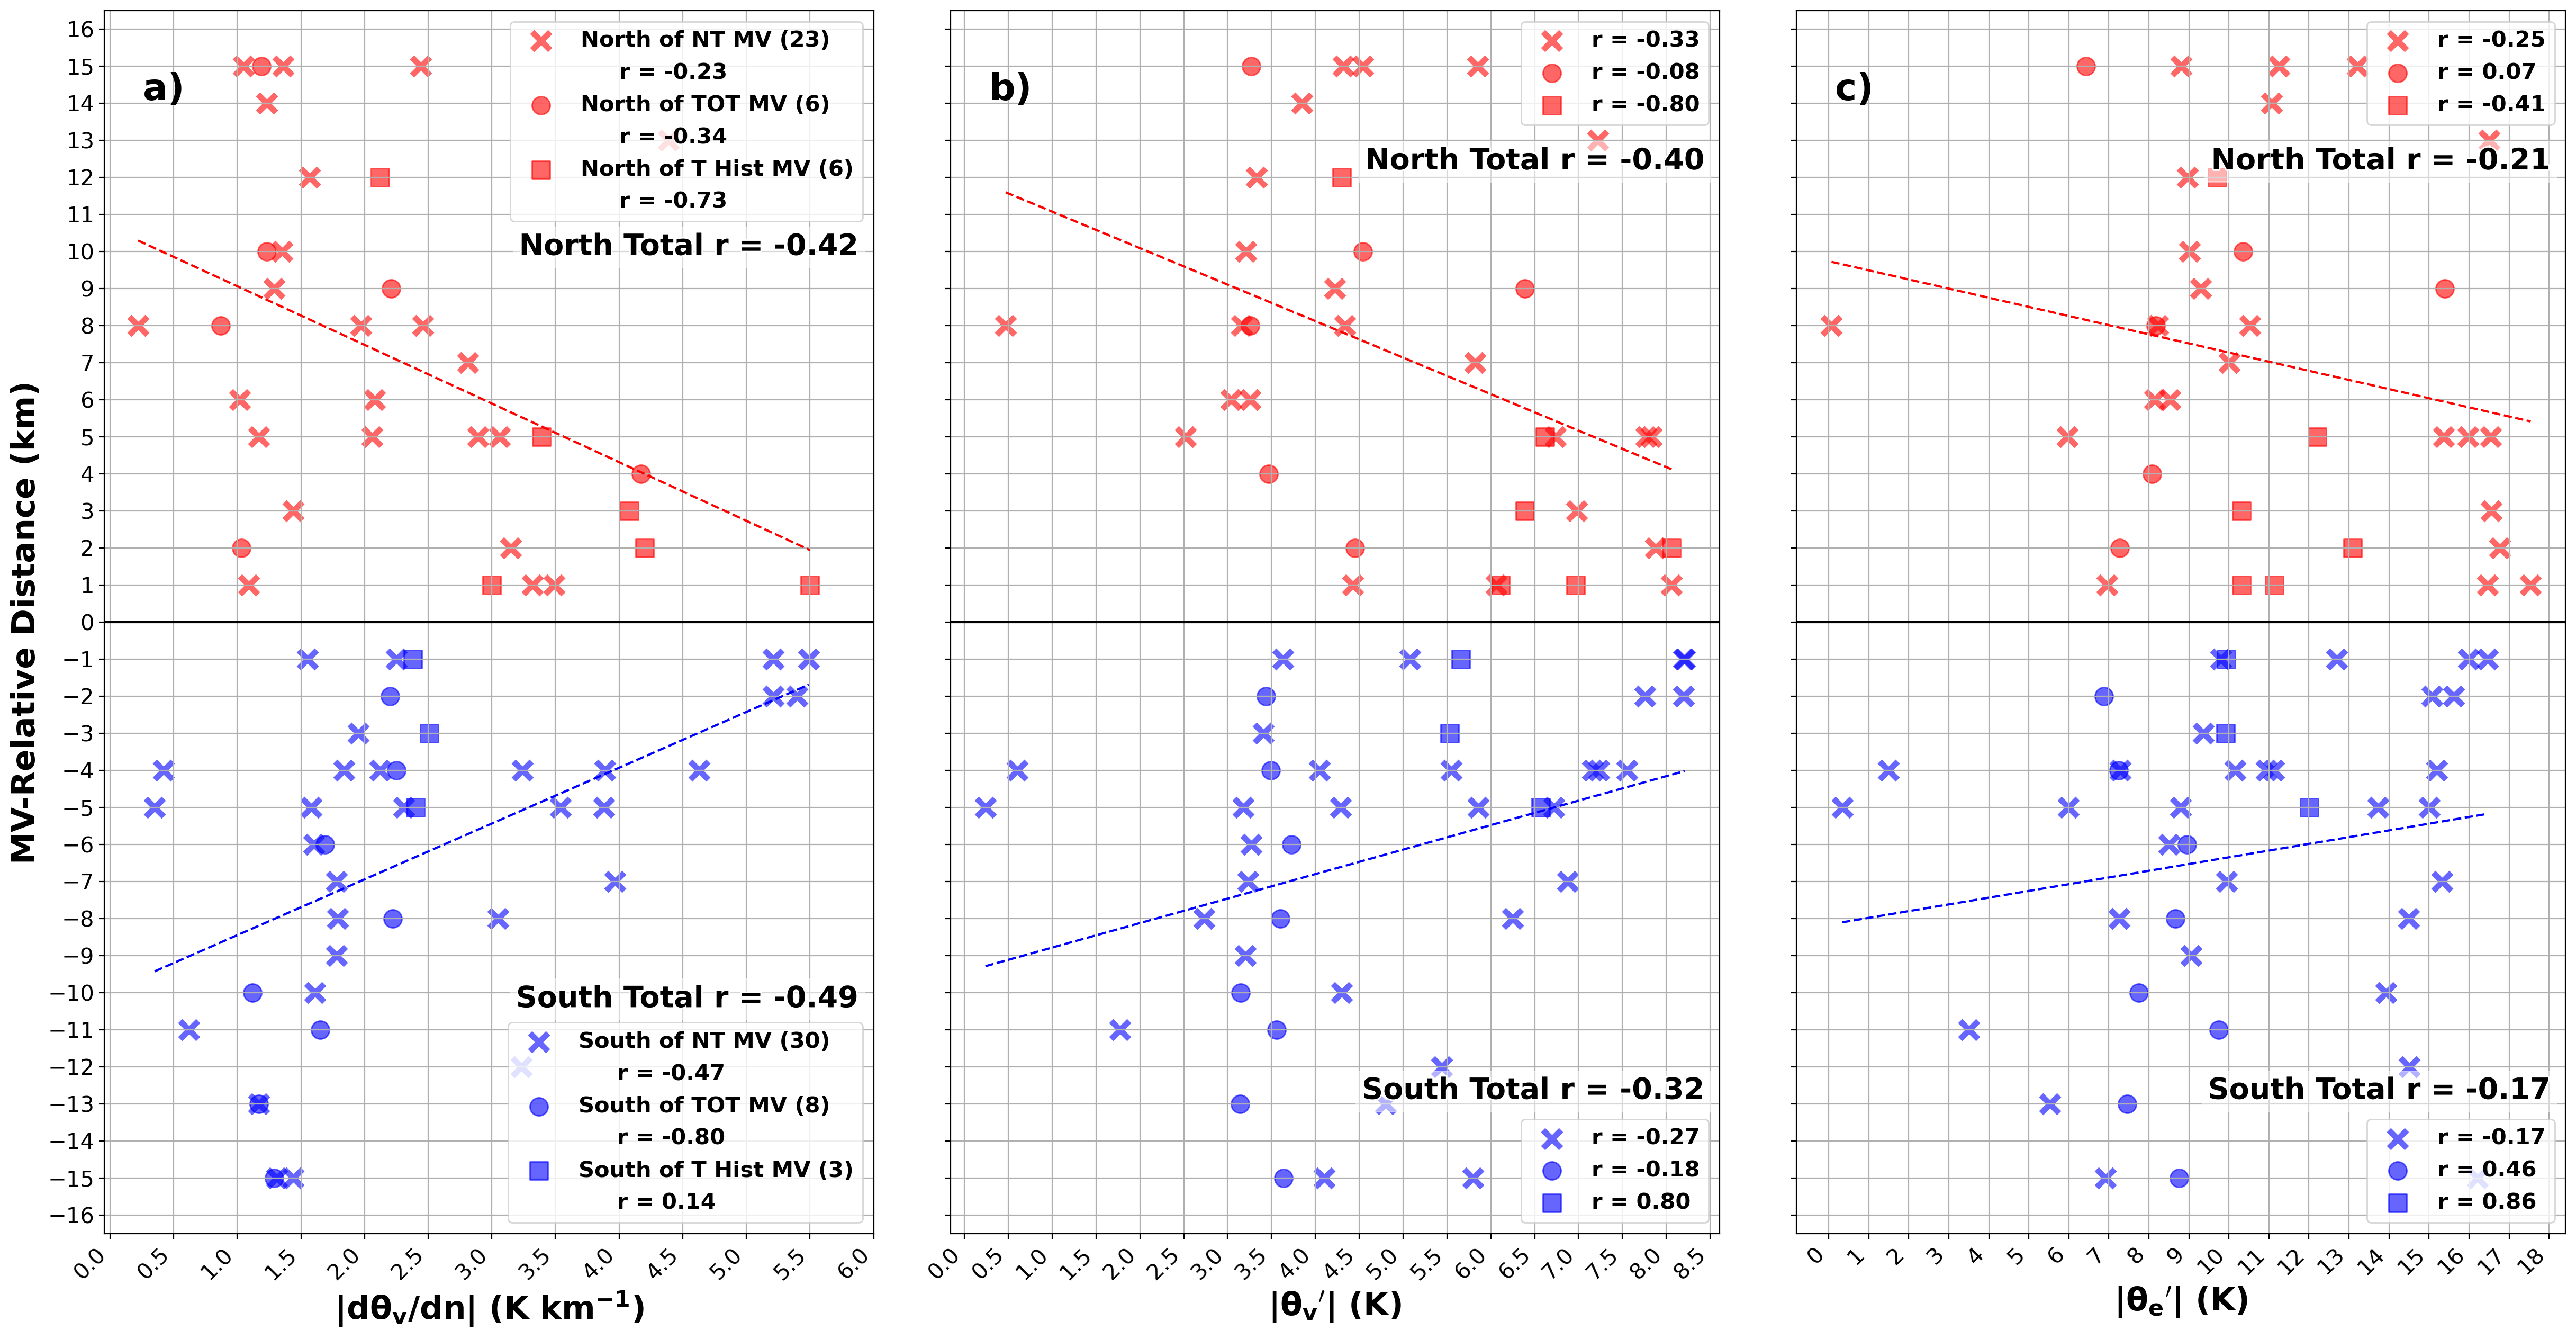

In [10]:
import matplotlib.patheffects as path_effects

fig, axes = plt.subplots(1,3, figsize=(30,15), sharey = 'row')

# for (v, c) in [('S', 'b'), ('N', 'r')]:
#     plt.scatter(MV_NT.loc[MV_NT.Directionality == v]['MV_H_dist'], MV_NT.loc[MV_NT.Directionality == v]['dTVdn'], s = 150,c=c,marker='x',alpha=0.6,linewidth=4)
#     plt.scatter(MV_T.loc[(MV_T.Directionality == v) & (MV_T.tor == 'TOT')]['MV_H_dist'], MV_T.loc[(MV_T.Directionality == v) & (MV_T.tor == 'TOT')]['dTVdn'], s = 500,c=c,marker='o',alpha=0.6)
#     plt.scatter(MV_T.loc[(MV_T.Directionality == v) & (MV_T.tor != 'TOT')]['MV_H_dist'], MV_T.loc[(MV_T.Directionality == v) & (MV_T.tor != 'TOT')]['dTVdn'], s = 150,c=c,marker='s',alpha=0.6)
axes[0].grid()
p1=axes[0].scatter(abs(MV_NT.loc[MV_NT.Directionality == 'N']['dTVdn']),(MV_NT.loc[MV_NT.Directionality == 'N']['MV_H_dist']), s = 150,c='r',marker='x',alpha=0.6,linewidth=4,label='North of NT MV (23)')
p2=axes[0].scatter([], [], alpha=0, label='     r = '+str("{:.2f}".format(N_NT)))
p3=axes[0].scatter(abs(MV_NT.loc[MV_NT.Directionality == 'S']['dTVdn']),-(MV_NT.loc[MV_NT.Directionality == 'S']['MV_H_dist']), s = 150,c='b',marker='x',alpha=0.6,linewidth=4,label='South of NT MV (30)')
p4=axes[0].scatter([], [], alpha=0, label='     r = '+str("{:.2f}".format(S_NT)))
p5=axes[0].scatter(abs(MV_T.loc[(MV_T.Directionality == 'N') & (MV_T.tor == 'TOT')]['dTVdn']), (MV_T.loc[(MV_T.Directionality == 'N') & (MV_T.tor == 'TOT')]['MV_H_dist']), s = 150,c='r',marker='o',alpha=0.6,label='North of TOT MV (6)')
p6=axes[0].scatter([], [], alpha=0, label='     r = '+str("{:.2f}".format(N_TOT)))
p7=axes[0].scatter(abs(MV_T.loc[(MV_T.Directionality == 'S') & (MV_T.tor == 'TOT')]['dTVdn']), -(MV_T.loc[(MV_T.Directionality == 'S') & (MV_T.tor == 'TOT')]['MV_H_dist']), s = 150,c='b',marker='o',alpha=0.6,label='South of TOT MV (8)')
p8=axes[0].scatter([], [], alpha=0, label='     r = '+str("{:.2f}".format(S_TOT)))
p9=axes[0].scatter(abs(MV_T.loc[(MV_T.Directionality == 'N') & (MV_T.tor != 'TOT') & (MV_T.tor != 'NT')]['dTVdn']),(MV_T.loc[(MV_T.Directionality == "N") & (MV_T.tor != 'TOT') & (MV_T.tor != 'NT')]['MV_H_dist']), s = 150,c='r',marker='s',alpha=0.6,label='North of T Hist MV (6)')
p10=axes[0].scatter([], [], alpha=0, label='     r = '+str("{:.2f}".format(N_HIST)))
p11=axes[0].scatter(abs(MV_T.loc[(MV_T.Directionality == 'S') & (MV_T.tor != 'TOT') & (MV_T.tor != 'NT')]['dTVdn']),-(MV_T.loc[(MV_T.Directionality == 'S') & (MV_T.tor != 'TOT') & (MV_T.tor != 'NT')]['MV_H_dist']), s = 150,c='b',marker='s',alpha=0.6,label='South of T Hist MV (3)')
p12=axes[0].scatter([], [], alpha=0, label='     r = '+str("{:.2f}".format(S_HIST)))

a1, b1 = np.polyfit(abs(pd.concat([(MV_NT.loc[MV_NT.Directionality == 'N']['dTVdn']),(MV_T.loc[MV_T.Directionality == 'N']['dTVdn'])])).values,
                    pd.concat([(MV_NT.loc[MV_NT.Directionality == 'N']['MV_H_dist']),(MV_T.loc[MV_T.Directionality == 'N']['MV_H_dist'])]).values,1)
a2, b2 = np.polyfit(abs(pd.concat([(MV_NT.loc[MV_NT.Directionality == 'S']['dTVdn']),(MV_T.loc[MV_T.Directionality == 'S']['dTVdn'])])).values,
                    -pd.concat([(MV_NT.loc[MV_NT.Directionality == 'S']['MV_H_dist']),(MV_T.loc[MV_T.Directionality == 'S']['MV_H_dist'])]).values,1)
axes[0].plot(sort(abs(pd.concat([(MV_NT.loc[MV_NT.Directionality == 'N']['dTVdn']),(MV_T.loc[MV_T.Directionality == 'N']['dTVdn'])])).values), 
         a1*sort(abs(pd.concat([(MV_NT.loc[MV_NT.Directionality == 'N']['dTVdn']),(MV_T.loc[MV_T.Directionality == 'N']['dTVdn'])])).values)+b1, ls='--',color='r')
axes[0].plot(sort(abs(pd.concat([(MV_NT.loc[MV_NT.Directionality == 'S']['dTVdn']),(MV_T.loc[MV_T.Directionality == 'S']['dTVdn'])])).values), 
         a2*sort(abs(pd.concat([(MV_NT.loc[MV_NT.Directionality == 'S']['dTVdn']),(MV_T.loc[MV_T.Directionality == 'S']['dTVdn'])])).values)+b2, ls='--',color='b')

legend1=axes[0].legend(handles=[p1,p2,p5,p6,p9,p10],loc='upper right',prop={'weight':'bold','size':15})
legend2=axes[0].legend(handles=[p3,p4,p7,p8,p11,p12],loc='lower right',prop={'weight':'bold','size':15})
axes[0].add_artist(legend1)
text = axes[0].text(0.98, 0.8, 'North Total r = '+str("{:.2f}".format(N_total)), ha='right', fontsize=20, weight='bold',transform=axes[0].transAxes)
text.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'),path_effects.Normal()])
text.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='white'))
text1 = axes[0].text(0.98, 0.185, 'South Total r = '+str("{:.2f}".format(S_total)), ha='right', fontsize=20, weight='bold',transform=axes[0].transAxes)
text1.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'),path_effects.Normal()])
text1.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='white'))

axes[1].grid()
q1=axes[1].scatter(abs(MV_NT.loc[MV_NT.Directionality == 'N']['TV']),(MV_NT.loc[MV_NT.Directionality == 'N']['MV_H_dist']), s = 150,c='r',marker='x',alpha=0.6,linewidth=4, label='r = '+str("{:.2f}".format(N_NT1)))
q2=axes[1].scatter(abs(MV_NT.loc[MV_NT.Directionality == 'S']['TV']),-(MV_NT.loc[MV_NT.Directionality == 'S']['MV_H_dist']), s = 150,c='b',marker='x',alpha=0.6,linewidth=4, label='r = '+str("{:.2f}".format(S_NT1)))
q3=axes[1].scatter(abs(MV_T.loc[(MV_T.Directionality == 'N') & (MV_T.tor == 'TOT')]['TV']), (MV_T.loc[(MV_T.Directionality == 'N') & (MV_T.tor == 'TOT')]['MV_H_dist']), s = 150,c='r',marker='o',alpha=0.6, label='r = '+str("{:.2f}".format(N_TOT1)))
q4=axes[1].scatter(abs(MV_T.loc[(MV_T.Directionality == 'S') & (MV_T.tor == 'TOT')]['TV']), -(MV_T.loc[(MV_T.Directionality == 'S') & (MV_T.tor == 'TOT')]['MV_H_dist']), s = 150,c='b',marker='o',alpha=0.6, label='r = '+str("{:.2f}".format(S_TOT1)))
q5=axes[1].scatter(abs(MV_T.loc[(MV_T.Directionality == 'N') & (MV_T.tor != 'TOT') & (MV_T.tor != 'NT')]['TV']),(MV_T.loc[(MV_T.Directionality == "N") & (MV_T.tor != 'TOT') & (MV_T.tor != 'NT')]['MV_H_dist']), s = 150,c='r',marker='s',alpha=0.6, label='r = '+str("{:.2f}".format(N_HIST1)))
q6=axes[1].scatter(abs(MV_T.loc[(MV_T.Directionality == 'S') & (MV_T.tor != 'TOT') & (MV_T.tor != 'NT')]['TV']),-(MV_T.loc[(MV_T.Directionality == 'S') & (MV_T.tor != 'TOT') & (MV_T.tor != 'NT')]['MV_H_dist']), s = 150,c='b',marker='s',alpha=0.6, label='r = '+str("{:.2f}".format(S_HIST1)))

a1, b1 = np.polyfit(abs(pd.concat([(MV_NT.loc[MV_NT.Directionality == 'N']['TV']),(MV_T.loc[MV_T.Directionality == 'N']['TV'])])).values,
                    pd.concat([(MV_NT.loc[MV_NT.Directionality == 'N']['MV_H_dist']),(MV_T.loc[MV_T.Directionality == 'N']['MV_H_dist'])]).values,1)
a2, b2 = np.polyfit(abs(pd.concat([(MV_NT.loc[MV_NT.Directionality == 'S']['TV']),(MV_T.loc[MV_T.Directionality == 'S']['TV'])])).values,
                    -pd.concat([(MV_NT.loc[MV_NT.Directionality == 'S']['MV_H_dist']),(MV_T.loc[MV_T.Directionality == 'S']['MV_H_dist'])]).values,1)
axes[1].plot(sort(abs(pd.concat([(MV_NT.loc[MV_NT.Directionality == 'N']['TV']),(MV_T.loc[MV_T.Directionality == 'N']['TV'])])).values), 
         a1*sort(abs(pd.concat([(MV_NT.loc[MV_NT.Directionality == 'N']['TV']),(MV_T.loc[MV_T.Directionality == 'N']['TV'])])).values)+b1, ls='--',color='r')
axes[1].plot(sort(abs(pd.concat([(MV_NT.loc[MV_NT.Directionality == 'S']['TV']),(MV_T.loc[MV_T.Directionality == 'S']['TV'])])).values), 
         a2*sort(abs(pd.concat([(MV_NT.loc[MV_NT.Directionality == 'S']['TV']),(MV_T.loc[MV_T.Directionality == 'S']['TV'])])).values)+b2, ls='--',color='b')

legend3=axes[1].legend(handles=[q1,q3,q5],loc='upper right',prop={'weight':'bold','size':15})
legend4=axes[1].legend(handles=[q2,q4,q6],loc='lower right',prop={'weight':'bold','size':15})
axes[1].add_artist(legend3)
text2 = axes[1].text(0.98, 0.87, 'North Total r = '+str("{:.2f}".format(N_total1)), ha='right', fontsize=20, weight='bold',transform=axes[1].transAxes)
text2.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'),path_effects.Normal()])
text2.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='white'))
text3 = axes[1].text(0.98, 0.11, 'South Total r = '+str("{:.2f}".format(S_total1)), ha='right', fontsize=20, weight='bold',transform=axes[1].transAxes)
text3.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'),path_effects.Normal()])
text3.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='white'))

axes[2].grid()
o1=axes[2].scatter(abs(MV_NT.loc[MV_NT.Directionality == 'N']['TE']),(MV_NT.loc[MV_NT.Directionality == 'N']['MV_H_dist']), s = 150,c='r',marker='x',alpha=0.6,linewidth=4, label='r = '+str("{:.2f}".format(N_NT2)))
o2=axes[2].scatter(abs(MV_NT.loc[MV_NT.Directionality == 'S']['TE']),-(MV_NT.loc[MV_NT.Directionality == 'S']['MV_H_dist']), s = 150,c='b',marker='x',alpha=0.6,linewidth=4, label='r = '+str("{:.2f}".format(S_NT2)))
o3=axes[2].scatter(abs(MV_T.loc[(MV_T.Directionality == 'N') & (MV_T.tor == 'TOT')]['TE']), (MV_T.loc[(MV_T.Directionality == 'N') & (MV_T.tor == 'TOT')]['MV_H_dist']), s = 150,c='r',marker='o',alpha=0.6, label='r = '+str("{:.2f}".format(N_TOT2)))
o4=axes[2].scatter(abs(MV_T.loc[(MV_T.Directionality == 'S') & (MV_T.tor == 'TOT')]['TE']), -(MV_T.loc[(MV_T.Directionality == 'S') & (MV_T.tor == 'TOT')]['MV_H_dist']), s = 150,c='b',marker='o',alpha=0.6, label='r = '+str("{:.2f}".format(S_TOT2)))
o5=axes[2].scatter(abs(MV_T.loc[(MV_T.Directionality == 'N') & (MV_T.tor != 'TOT') & (MV_T.tor != 'NT')]['TE']),(MV_T.loc[(MV_T.Directionality == "N") & (MV_T.tor != 'TOT') & (MV_T.tor != 'NT')]['MV_H_dist']), s = 150,c='r',marker='s',alpha=0.6, label='r = '+str("{:.2f}".format(N_HIST2)))
o6=axes[2].scatter(abs(MV_T.loc[(MV_T.Directionality == 'S') & (MV_T.tor != 'TOT') & (MV_T.tor != 'NT')]['TE']),-(MV_T.loc[(MV_T.Directionality == 'S') & (MV_T.tor != 'TOT') & (MV_T.tor != 'NT')]['MV_H_dist']), s = 150,c='b',marker='s',alpha=0.6, label='r = '+str("{:.2f}".format(S_HIST2)))

a1, b1 = np.polyfit(abs(pd.concat([(MV_NT.loc[MV_NT.Directionality == 'N']['TE']),(MV_T.loc[MV_T.Directionality == 'N']['TE'])])).values,
                    pd.concat([(MV_NT.loc[MV_NT.Directionality == 'N']['MV_H_dist']),(MV_T.loc[MV_T.Directionality == 'N']['MV_H_dist'])]).values,1)
a2, b2 = np.polyfit(abs(pd.concat([(MV_NT.loc[MV_NT.Directionality == 'S']['TE']),(MV_T.loc[MV_T.Directionality == 'S']['TE'])])).values,
                    -pd.concat([(MV_NT.loc[MV_NT.Directionality == 'S']['MV_H_dist']),(MV_T.loc[MV_T.Directionality == 'S']['MV_H_dist'])]).values,1)
axes[2].plot(sort(abs(pd.concat([(MV_NT.loc[MV_NT.Directionality == 'N']['TE']),(MV_T.loc[MV_T.Directionality == 'N']['TE'])])).values), 
         a1*sort(abs(pd.concat([(MV_NT.loc[MV_NT.Directionality == 'N']['TE']),(MV_T.loc[MV_T.Directionality == 'N']['TE'])])).values)+b1, ls='--',color='r')
axes[2].plot(sort(abs(pd.concat([(MV_NT.loc[MV_NT.Directionality == 'S']['TE']),(MV_T.loc[MV_T.Directionality == 'S']['TE'])])).values), 
         a2*sort(abs(pd.concat([(MV_NT.loc[MV_NT.Directionality == 'S']['TE']),(MV_T.loc[MV_T.Directionality == 'S']['TE'])])).values)+b2, ls='--',color='b')

legend5=axes[2].legend(handles=[o1,o3,o5],loc='upper right',prop={'weight':'bold','size':15})
legend6=axes[2].legend(handles=[o2,o4,o6],loc='lower right',prop={'weight':'bold','size':15})
axes[2].add_artist(legend5)
text4 = axes[2].text(0.98, 0.87, 'North Total r = '+str("{:.2f}".format(N_total2)), ha='right', fontsize=20, weight='bold',transform=axes[2].transAxes)
text4.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'),path_effects.Normal()])
text4.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='white'))
text5 = axes[2].text(0.98, 0.11, 'South Total r = '+str("{:.2f}".format(S_total2)), ha='right', fontsize=20, weight='bold',transform=axes[2].transAxes)
text5.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'),path_effects.Normal()])
text5.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='white'))

axes[0].axhline(y=0, color='k', linestyle='-')
axes[1].axhline(y=0, color='k', linestyle='-')
axes[2].axhline(y=0, color='k', linestyle='-')
axes[0].set_ylabel('MV-Relative Distance (km)',fontweight='bold',fontsize=22)
axes[0].set_xlabel(r'$\mathbf{|d\theta_v/{dn}|}$ (K km$\mathbf{^{-1}}$)',fontweight='bold',fontsize=22)
axes[1].set_xlabel(r'$\mathbf{|{\theta_v}^\prime|}$ (K)',fontweight='bold',fontsize=22)
axes[2].set_xlabel(r'$\mathbf{|{\theta_e}^\prime|}$ (K)',fontweight='bold',fontsize=22)
#plt.title("StickNet-Relative Mesovortex Gradient Analysis",fontweight='bold',fontsize=25)
axes[0].set_yticks([-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
axes[0].set_xticks([0,.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6])
# axes[1].set_xticks([2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5])
# axes[2].set_xticks([4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12,12.5,13,13.5,14,14.5,15,15.5,16])
axes[1].set_xticks([0,.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5])
axes[2].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
plt.setp(axes[0].get_xticklabels(),fontsize=15,rotation=45, horizontalalignment='right')
plt.setp(axes[0].get_yticklabels(),fontsize=15)
plt.setp(axes[1].get_xticklabels(),fontsize=15,rotation=45, horizontalalignment='right')
plt.setp(axes[1].get_yticklabels(),fontsize=15)
plt.setp(axes[2].get_xticklabels(),fontsize=15,rotation=45, horizontalalignment='right')
plt.setp(axes[2].get_yticklabels(),fontsize=15)

axes[0].text(0.05, 0.95, 'a)', transform=axes[0].transAxes,
      fontsize=25, fontweight='bold', va='top')
axes[1].text(0.05, 0.95, 'b)', transform=axes[1].transAxes,
      fontsize=25, fontweight='bold', va='top')
axes[2].text(0.05, 0.95, 'c)', transform=axes[2].transAxes,
      fontsize=25, fontweight='bold', va='top')


plt.subplots_adjust(wspace=0.1,hspace=0.05)
#save_dir = 'E:\\NewFigsY1Y2\\'
plt.savefig('E://MVdist.png', bbox_inches = 'tight', format='png', dpi=300)